<a href="https://colab.research.google.com/github/FajarWahyuSuryaputra/Pembelajaran_Mesin/blob/main/deepComputerVisionWithCNNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama: Fajar Wahyu Suryaputra
### Nim: 4.33.23.1.08
### Kelas: TI-2B

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('train.csv')

X = data.drop('label', axis=1).values
y = data['label'].values

X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

y = to_categorical(y, num_classes=10)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 120s 193ms/step - accuracy: 0.8591 - loss: 0.4726 - val_accuracy: 0.9448 - val_loss: 0.1896
Epoch 2/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 116s 196ms/step - accuracy: 0.9752 - loss: 0.0787 - val_accuracy: 0.9876 - val_loss: 0.0400
Epoch 3/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 140s 193ms/step - accuracy: 0.9810 - loss: 0.0605 - val_accuracy: 0.9907 - val_loss: 0.0295
Epoch 4/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 140s 189ms/step - accuracy: 0.9838 - loss: 0.0488 - val_accuracy: 0.9883 - val_loss: 0.0405
Epoch 5/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 143s 192ms/step - accuracy: 0.9885 - loss: 0.0365 - val_accuracy: 0.9902 - val_loss: 0.0285


In [ ]:
score = model.evaluate(X_val, y_val)
print(f"Akurasi Validasi: {score[1] * 100:.2f}%")

132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9902 - loss: 0.0268
Akurasi Validasi: 99.02%


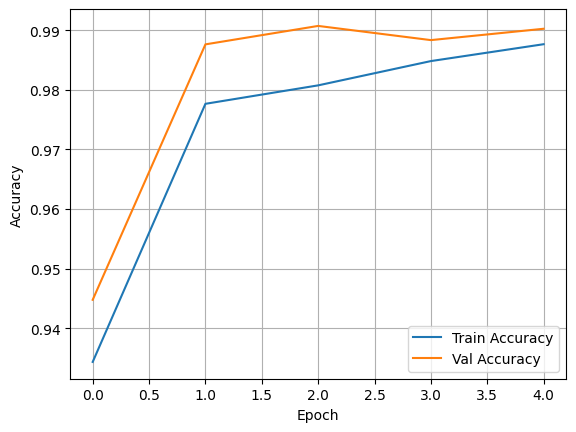

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()